<a href="https://colab.research.google.com/github/mahirbarot/ai_endsem/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

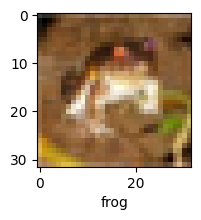

In [10]:
plot_sample(X_train, y_train, 0)

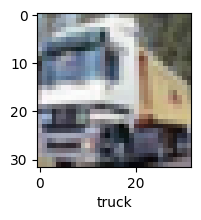

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 4ms/step - loss: 1.8145 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6250 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5387 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4791 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4279 - accuracy: 0.4957


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.55      0.67      0.60      1000
           2       0.51      0.12      0.20      1000
           3       0.30      0.51      0.37      1000
           4       0.45      0.40      0.42      1000
           5       0.42      0.33      0.37      1000
           6       0.57      0.43      0.49      1000
           7       0.52      0.58      0.55      1000
           8       0.52      0.70      0.60      1000
           9       0.61      0.49      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 5ms/step - loss: 1.4514 - accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1124 - accuracy: 0.6112
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9936 - accuracy: 0.6536
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9068 - accuracy: 0.6857
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8437 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7876 - accuracy: 0.7252
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7388 - accuracy: 0.7422
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6930 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6536 - accuracy: 0.7740
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.62

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9826 - accuracy: 0.6851


[0.9825913310050964, 0.6851000189781189]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.10812505e-05, 1.66564878e-05, 2.34839483e-03, 8.94070745e-01,
        1.28143627e-04, 9.43111852e-02, 8.82203598e-03, 5.53021891e-06,
        2.75391038e-04, 9.00963414e-07],
       [3.12371616e-04, 1.30155236e-01, 2.25592274e-07, 4.64822818e-07,
        1.51188146e-08, 4.96012476e-08, 5.04761788e-10, 2.51875587e-08,
        8.69115233e-01, 4.16421826e-04],
       [1.75909132e-01, 1.03753865e-01, 3.70905697e-02, 9.17059183e-02,
        1.15558524e-02, 3.55880037e-02, 2.54707673e-04, 1.14381135e-01,
        1.00320660e-01, 3.29440087e-01],
       [9.50265765e-01, 2.34593567e-03, 1.39202680e-02, 7.85972178e-03,
        1.50033096e-02, 2.20720161e-04, 2.78384759e-05, 3.29855218e-04,
        9.93264467e-03, 9.38943122e-05],
       [1.69195957e-07, 5.07795448e-05, 2.79568508e-02, 4.64163981e-02,
        2.51148880e-01, 8.63754132e-04, 6.73560679e-01, 4.31576865e-07,
        1.70333237e-06, 3.80990940e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

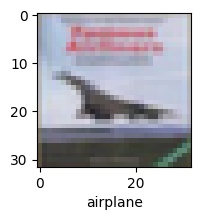

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'



Enter 1 to randomly generate image and predict.
2 to exit
1
we'll be predicting..


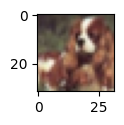

1/1 [==============================] - 0s 24ms/step
Predicted class: dog


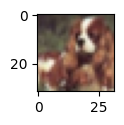



Enter 1 to randomly generate image and predict.
2 to exit
1
we'll be predicting..


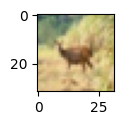

1/1 [==============================] - 0s 34ms/step
Predicted class: deer


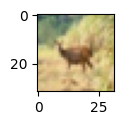



Enter 1 to randomly generate image and predict.
2 to exit
1
we'll be predicting..


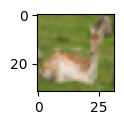

1/1 [==============================] - 0s 21ms/step
Predicted class: frog


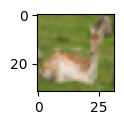



Enter 1 to randomly generate image and predict.
2 to exit
1
we'll be predicting..


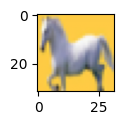

1/1 [==============================] - 0s 31ms/step
Predicted class: horse


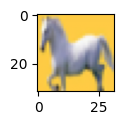



Enter 1 to randomly generate image and predict.
2 to exit
2


In [94]:
from random import randint
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
               5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
x=True
while(x):
  ip=input("\n\nEnter 1 to randomly generate image and predict.\n2 to exit\n")
  if(ip=='1'):
    val=randint(0,1000)
    img = X_test[val]
    print("we'll be predicting..")
    plt.figure(figsize = (1,1))
    plt.imshow(img)
    plt.show()

    img_c=img.data
    img = np.expand_dims(img, axis=0)
    predictions = cnn.predict(img)
    predicted_class = np.argmax(predictions)
    print('Predicted class:', class_names[predicted_class])
    plt.figure(figsize = (1,1))
    plt.imshow(img_c)
    plt.show()
  else:
    x=False

1/1 [==============================] - 0s 21ms/step
Predicted class: truck


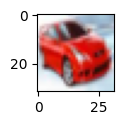

In [79]:
#from keras.preprocessing import image
import keras.utils as image
# Upload a custom image to test the CNN
custom_image_path = '/content/automobile10.png'

# Load the image and resize it to 32x32 pixels
img = image.load_img(custom_image_path, target_size=(32, 32))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the array to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Use the model to predict the class of the image
predictions = cnn.predict(img_array)
predicted_class = np.argmax(predictions)

# Print the predicted class name
print('Predicted class:', class_names[predicted_class])

# Display the custom image
plt.figure(figsize = (1,1))
plt.imshow(img)
plt.show()


In [80]:
from keras.models import save_model
save_model(cnn, 'cnn_cifar10.h5')

In [93]:

from keras.models import load_model
model=load_model('/content/cnn_cifar10.h5')
from keras.utils import load_img, img_to_array

# Load the image and convert it to a NumPy array
img = load_img('/content/automobile10.png', target_size=(32, 32))
x = img_to_array(img)

# # Add a batch dimension to the array
# x = x.reshape((1,) + x.shape)

# Make a prediction using the model
y_pred = model.predict(x)




y=model.predict(X_test[0])


ValueError: ignored